In [1]:
using Revise
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

-----

In [2]:
pdb_xtal = readpdb("/data/higashi/grest_4krn_swissmodel_DIHEDRAL/ground_truth.pdb");

pdb_init = readpdb("/data/higashi/grest_4krn_swissmodel_DIHEDRAL/prot.pdb");
ta1 = readdcd("/data/higashi/grest_4krn_swissmodel_DIHEDRAL/07_remd_convert/run_param1.dcd", isbox=false);
#ta2 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/08_remd_convert/run_param1.dcd", isbox=false);
#ta3 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/09_remd_convert/run_param1.dcd", isbox=false);
#ta4 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/10_remd_convert/run_param1.dcd", isbox=false);
#ta5 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/11_remd_convert/run_param1.dcd", isbox=false);
#ta = [pdb_init; ta1; ta2; ta3; ta4; ta5];
#ta = [pdb_init; ta1; ta2; ta3; ta4];
ta = [pdb_init; ta1]

100001x1987 TrjArray{Float64, Int64}
|                            |                            |  …                              |
| 1GLN                       | 1GLN                       |  …   129SER                     |
| 1N                         | 2HT1                       |  …   1987HT3                    |
|    15.20    -9.22    -8.26 |    15.15    -9.02    -7.24 |  …     -25.14     1.08    -0.68 |
|    11.60   -25.43    -5.26 |    11.84   -26.23    -4.64 |        -23.76   -12.19     8.37 |
|    11.95   -25.35    -5.10 |    12.30   -26.09    -4.46 |        -23.54   -12.42     8.02 |
|    11.71   -25.83    -5.37 |    12.15   -26.65    -4.92 |        -23.78   -13.20     7.88 |
|    12.01   -25.61    -5.03 |    12.19   -26.49    -4.50 |        -23.78   -12.54     8.49 |
|    11.45   -25.73    -5.26 |    11.62   -26.63    -4.77 |  …     -23.47   -12.78     7.96 |
|    11.41   -25.34    -5.67 |    11.59   -26.35    -5.45 |        -24.21   -13.32     8.10 |
|    11.65   -25.15    

In [3]:
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:120)"]
pdb_init = pdb_init["(atomname CA) and (resid 100:120)"]
ta = ta["(atomname CA) and (resid 100:120)"];
#ta = ta["(atomname CA) and (resid 20:125)"];

In [4]:
ta

100001x21 TrjArray{Float64, Int64}
|                            |                            |  …                              |
| 100TYR                     | 101LEU                     |  …   120TRP                     |
| 1CA                        | 2CA                        |  …   21CA                       |
|    14.39     1.12    -2.40 |    13.47     4.53    -0.80 |  …       3.99    -3.13    -8.90 |
|    10.74   -11.28    -6.91 |     9.35    -7.87    -5.62 |          1.31   -20.08    -4.84 |
|    10.56   -11.36    -6.33 |     9.47    -7.82    -5.36 |          1.31   -19.70    -4.95 |
|    10.67   -11.66    -6.36 |     9.66    -8.12    -5.07 |          1.17   -19.80    -5.02 |
|    10.89   -11.42    -6.25 |     9.48    -7.92    -5.28 |          1.32   -20.12    -4.91 |
|    11.19   -11.50    -6.58 |     9.75    -8.10    -5.30 |  …       1.54   -20.11    -4.81 |
|    11.28   -11.51    -6.37 |     9.95    -8.00    -5.24 |          1.36   -19.91    -4.97 |
|    11.21   -11.52    -6

In [5]:
x_xtal = MDToolbox.compute_distancemap(pdb_xtal);
x_init = MDToolbox.compute_distancemap(pdb_init);

In [6]:
X = MDToolbox.compute_distancemap(ta);

In [7]:
X_mean = mean(X, dims=1)

1×171 Matrix{Float64}:
 9.23528  11.0122  11.7031  14.3252  16.8876  15.2075  …  10.3377  11.0644  9.5692  11.2274  7.62781

In [8]:
X .= X .- X_mean
e = eigen(X' * X ./ size(X, 1))
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]
P = X * W

100001×171 Matrix{Float64}:
  29.4263    -2.0211   -4.30687   -2.65963    1.56799    …  -0.000780094   0.0027059     0.0015402
  27.0414    -5.37146  -3.36043   -2.70501   -2.58757        0.0041235     0.000375291  -0.00229612
  26.0119    -6.17138  -3.46005   -2.19964   -0.938838       0.00133216    0.00340385    2.44294e-5
  25.7422    -6.40548  -2.53587   -2.2076    -0.524335       0.000851509   0.00266859    0.000703069
  25.7222    -6.66993  -3.8608    -3.19273   -0.367078       0.00231818   -0.000592559   0.000433492
  27.475     -5.40459  -4.66203   -3.71237   -1.32829    …   0.00340748    0.00416186    0.00177117
  27.5685    -6.24775  -4.59007   -3.03879   -1.41119        9.05365e-5    0.00326478    0.000670037
  28.1327    -5.4409   -6.48534   -3.13769   -1.03619        0.00136191    0.00199934    0.00067722
  28.4947    -4.70608  -8.0921    -3.39053   -0.812368      -0.00455589    0.000784637   8.93324e-5
  27.645     -6.13811  -7.71151   -3.86227   -0.275589       0.0011161

In [9]:
p_xtal = (x_xtal .- X_mean) * W
p_init = (x_init .- X_mean) * W

1×171 Matrix{Float64}:
 29.4263  -2.0211  -4.30687  -2.65963  1.56799  …  -0.000394246  -0.000780094  0.0027059  0.0015402

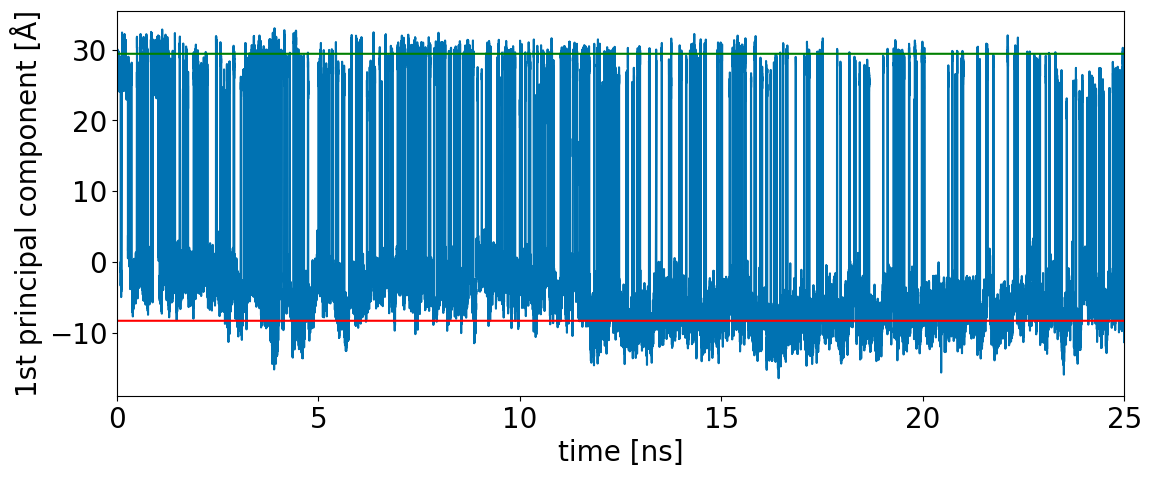

In [10]:
#fig, ax = subplots(figsize=(13, 5));
figure(figsize=(13,5),)
plot((1:size(P, 1)).*0.25*0.001, P[:, 1])
plot((1:size(P, 1)).*0.25*0.001, ones(size(P,1))*p_xtal[1], color=:red)
plot((1:size(P, 1)).*0.25*0.001, ones(size(P,1))*p_init[1], color=:green)
#ax[:set_xlim]([0,100])
xlim([0, 25])
ylabel("1st principal component [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
xticks(fontsize=20);
yticks(fontsize=20);
savefig("timeseries_grest.png", dpi=350, bbox_inches="tight");

In [11]:
P

100001×171 Matrix{Float64}:
  29.4263    -2.0211   -4.30687   -2.65963    1.56799    …  -0.000780094   0.0027059     0.0015402
  27.0414    -5.37146  -3.36043   -2.70501   -2.58757        0.0041235     0.000375291  -0.00229612
  26.0119    -6.17138  -3.46005   -2.19964   -0.938838       0.00133216    0.00340385    2.44294e-5
  25.7422    -6.40548  -2.53587   -2.2076    -0.524335       0.000851509   0.00266859    0.000703069
  25.7222    -6.66993  -3.8608    -3.19273   -0.367078       0.00231818   -0.000592559   0.000433492
  27.475     -5.40459  -4.66203   -3.71237   -1.32829    …   0.00340748    0.00416186    0.00177117
  27.5685    -6.24775  -4.59007   -3.03879   -1.41119        9.05365e-5    0.00326478    0.000670037
  28.1327    -5.4409   -6.48534   -3.13769   -1.03619        0.00136191    0.00199934    0.00067722
  28.4947    -4.70608  -8.0921    -3.39053   -0.812368      -0.00455589    0.000784637   8.93324e-5
  27.645     -6.13811  -7.71151   -3.86227   -0.275589       0.0011161

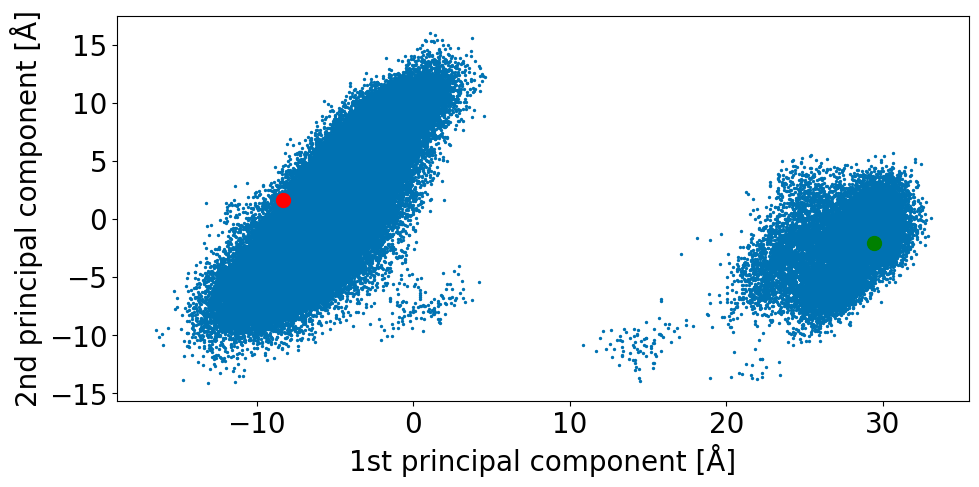

In [14]:
fig, ax = subplots(figsize=(11, 5));
ax.scatter(P[:, 1], P[:, 2], s=2.0);
ax.scatter(p_xtal[1], p_xtal[2], s=100.0, color=:red);
ax.scatter(p_init[1, 1], p_init[1, 2], s=100.0, color=:green);
xlabel("1st principal component [Å]",fontsize=20);
ylabel("2nd principal component [Å]",fontsize=20);

# detailed options (not necessary, just for reference)
#ax.set(xlim=[-20, 10], ylim=[-10, 15]);
#ax.xaxis.set_tick_params(which="major",labelsize=15);
#ax.yaxis.set_tick_params(which="major",labelsize=15);
#ax.grid(linestyle="--", linewidth=0.5);
#tight_layout();

xticks(fontsize=20);
yticks(fontsize=20);

savefig("scatter_grest.png", dpi=350);

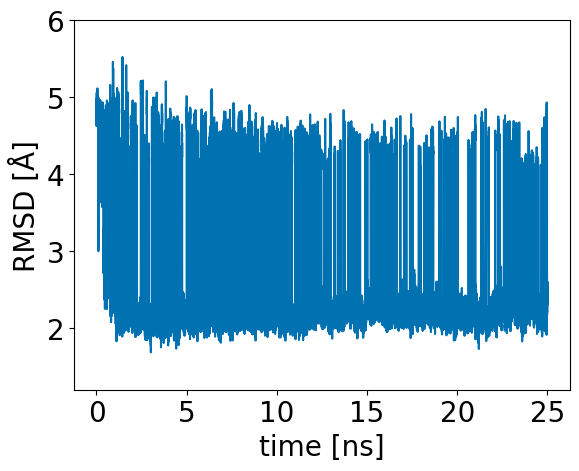

In [20]:
#figure(figsize=(13,5),)
#figure(figsize=(8,5),)
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted)
plot((1:size(P, 1)).*0.25*0.001, rmsd)
xticks(fontsize=20);
yticks(fontsize=20);
ylabel("RMSD [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
ylim([1.2, 6])
#ylim([1.5, 6.6])
#xlim([0, 120])
savefig("rmsd_dihed_4krn.png", dpi=350, bbox_inches="tight");